# Features from bureau_balance dataset

This notebook creates features from the bureau_balance dataset and displays the distribution of both categorical and numerical features. The bureau_balance dataset contains information regarding the monthly balance of past credits (active or closed) provided by other financial institutions that were reported to the Credit Bureau for clients in the application dataset. It is linked to the bureau dataset via the SK_ID_BUREAU feature.

In [1]:
# Importing main modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import time
%matplotlib inline
pd.set_option('display.max_columns', 2000)

# Defining standard plot options
sns.set(font_scale=1.4)
sns.set_style("white")

# Reverting to old color palette
pal = sns.color_palette("deep")
pal = pal.as_hex()
pal[1], pal[2], pal[3] = pal[2], pal[3], pal[1]
sns.set_palette(pal)

In [2]:
# Loading application dataframe from csv file 
application = pd.read_csv("./data/application.csv")

In [3]:
# Reading data files into csv format
bureau = pd.read_csv("./data/bureau.csv")
bureau_balance = pd.read_csv("./data/bureau_balance.csv")
homecredit_columns_description = pd.read_csv("./data/homecredit_columns_description.csv", encoding="ISO-8859-1")

In [4]:
# Description of columns in bureau_balance dataset
description_application = homecredit_columns_description[homecredit_columns_description["Table"] == "bureau_balance.csv"]
for index, row in description_application.iterrows():
    print(row["Row"], row["Description"])

# Modification of STATUS data to convert into integer type
bureau_balance.loc[bureau_balance["STATUS"] == "C", "STATUS"] = -2
bureau_balance.loc[bureau_balance["STATUS"] == "X", "STATUS"] = -1
bureau_balance["STATUS"] = bureau_balance["STATUS"].astype(int)

bureau_balance.head(20)

SK_BUREAU_ID Recoded ID of Credit Bureau credit (unique coding for each application) - use this to join to CREDIT_BUREAU table 
MONTHS_BALANCE Month of balance relative to application date (-1 means the freshest balance date)
STATUS Status of Credit Bureau loan during the month (active, closed, DPD0-30,? [C means closed, X means status unknown, 0 means no DPD, 1 means maximal did during month between 1-30, 2 means DPD 31-60,? 5 means DPD 120+ or sold or written off ] )


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,-2
1,5715448,-1,-2
2,5715448,-2,-2
3,5715448,-3,-2
4,5715448,-4,-2
5,5715448,-5,-2
6,5715448,-6,-2
7,5715448,-7,-2
8,5715448,-8,-2
9,5715448,-9,0


In [5]:
# Merging bureau_balance and bureau dataframes to obtain link with application dataframe (SK_ID_CURR)
bureau_balance_id = bureau_balance.merge(bureau[["SK_ID_CURR", "SK_ID_BUREAU"]], on ="SK_ID_BUREAU", how = "left")
bureau_balance_id = bureau_balance_id.dropna(subset=['SK_ID_CURR'])
bureau_balance_id["SK_ID_CURR"] = bureau_balance_id["SK_ID_CURR"].astype(int)

In [6]:
# Extraction of features from bureau_balance dataset

# Creating empty lists for each new feature
nb_months_list = []
nb_late_payments_list = []
nb_late_payments_3m_list = [] 
nb_late_payments_12m_list = []
nb_late_payments_1_list = []
nb_late_payments_2_list = [] 
nb_late_payments_3_list = []
nb_late_payments_4_list = []
nb_late_payments_5_list = []
fr_late_payments = []

counter = 0
lenght = len(application)
for index, row in application.iterrows():
    counter += 1
    sys.stdout.write('\r'+"Progress:"+str(round(counter/lenght*100,1))+"%")
    df = bureau_balance_id[bureau_balance_id["SK_ID_CURR"] == row["SK_ID_CURR"]]
    if len(df) > 0:
        # Total number of months
        nb_months = len(df)             
        # Total number of late payments
        nb_late_payments = len(df[df["STATUS"] > 0])
        # Number of late payments over the last 3 months
        tmp = df[df["MONTHS_BALANCE"] >= -3]
        nb_late_payments_3m = len(tmp[tmp["STATUS"] > 0])
        # Number of late payments over the last 12 months
        tmp = df[df["MONTHS_BALANCE"] >= -12]
        nb_late_payments_12m = len(tmp[tmp["STATUS"] > 0])
        # Number of late payments labeled "1"
        nb_late_payments_1 = len(df[df["STATUS"] == 1])
        # Number of late payments labeled "2"
        nb_late_payments_2 = len(df[df["STATUS"] == 2]) 
        # Number of late payments labeled "3"
        nb_late_payments_3 = len(df[df["STATUS"] == 3])
        # Number of late payments labeled "4"
        nb_late_payments_4 = len(df[df["STATUS"] == 4]) 
        # Number of late payments labeled "5"
        nb_late_payments_5 = len(df[df["STATUS"] == 5])
        nb_months_list.append(nb_months)
        nb_late_payments_list.append(nb_late_payments)
        nb_late_payments_3m_list.append(nb_late_payments_3m)
        nb_late_payments_12m_list.append(nb_late_payments_12m)
        nb_late_payments_1_list.append(nb_late_payments_1)
        nb_late_payments_2_list.append(nb_late_payments_2)
        nb_late_payments_3_list.append(nb_late_payments_3)
        nb_late_payments_4_list.append(nb_late_payments_4)
        nb_late_payments_5_list.append(nb_late_payments_5)
        # Fraction of months with late payments in bureau balance
        if nb_months > 0:
            fr_late_payments.append(nb_late_payments/nb_months)
        else:
            fr_late_payments.append(np.NaN)
    else:
        nb_months_list.append(0)
        nb_late_payments_list.append(0)
        nb_late_payments_3m_list.append(0)
        nb_late_payments_12m_list.append(0)
        nb_late_payments_1_list.append(0)
        nb_late_payments_2_list.append(0)
        nb_late_payments_3_list.append(0)
        nb_late_payments_4_list.append(0)
        nb_late_payments_5_list.append(0)
        fr_late_payments.append(np.NaN)

Progress:100.0%

In [7]:
# Function to display description of selected feature
def add_description(table, row, description):
    list_description = [np.NaN, table, row, description, np.NaN]
    homecredit_columns_description.loc[len(homecredit_columns_description)] = list_description
    return homecredit_columns_description

In [8]:
# Creation of new features from bureau_balance dataset
application["nb_months_list"] = nb_months_list
add_description("bureau_balance.csv", "nb_months_list", "Total number of months in bureau balance")

application["nb_late_payments_list"] = nb_late_payments_list
add_description("bureau_balance.csv", "nb_late_payments_list", "Total number of late payment months in bureau balance")

application["nb_late_payments_3m_list"] = nb_late_payments_3m_list
add_description("bureau_balance.csv", "nb_late_payments_3m_list", "Number of late payments in the last 3 months in bureau balance")

application["nb_late_payments_12m_list"] = nb_late_payments_12m_list
add_description("bureau_balance.csv", "nb_late_payments_12m_list", "Number of late payments in the last 12 months in bureau balance")

application["nb_late_payments_1_list"] = nb_late_payments_1_list
add_description("bureau_balance.csv", "nb_late_payments_1_list", "Number of category 1 late payments months in bureau balance")

application["nb_late_payments_2_list"] = nb_late_payments_2_list
add_description("bureau_balance.csv", "nb_late_payments_2_list", "Number of category 2 late payments months in bureau balance")

application["nb_late_payments_3_list"] = nb_late_payments_3_list
add_description("bureau_balance.csv", "nb_late_payments_3_list", "Number of category 3 late payments months in bureau balance")

application["nb_late_payments_4_list"] = nb_late_payments_4_list
add_description("bureau_balance.csv", "nb_late_payments_4_list", "Number of category 4 late payments months in bureau balance")

application["nb_late_payments_5_list"] = nb_late_payments_5_list
add_description("bureau_balance.csv", "nb_late_payments_5_list", "Number of category 5 late payments months in bureau balance")

application["fr_late_payments"] = fr_late_payments
add_description("bureau_balance.csv", "fr_late_payments", "Fraction of months with late payments in bureau balance");

In [9]:
# Saving application dataframe into csv file
application.to_csv("./data/application.csv",index=False)

In [10]:
# Saving homecredit_columns_description dataframe into csv file
homecredit_columns_description.to_csv("./data/homecredit_columns_description.csv",index=False)

In [11]:
discrete_features = []

continuous_features = ["nb_months_list", "nb_late_payments_list", "nb_late_payments_3m_list", \
                       "nb_late_payments_12m_list", "nb_late_payments_1_list", "nb_late_payments_2_list", \
                       "nb_late_payments_3_list", "nb_late_payments_4_list", "nb_late_payments_5_list", \
                       "fr_late_payments"]

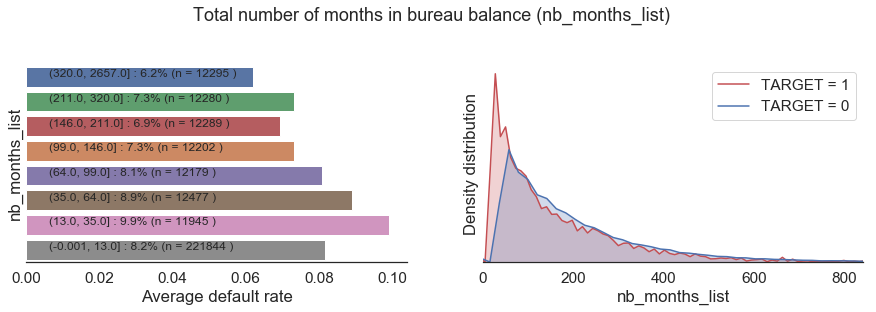

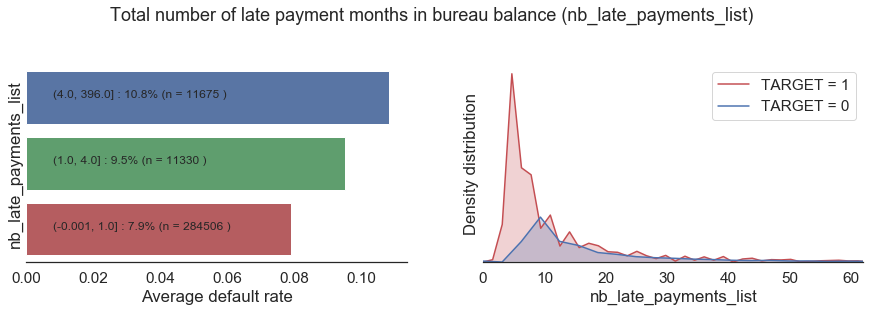

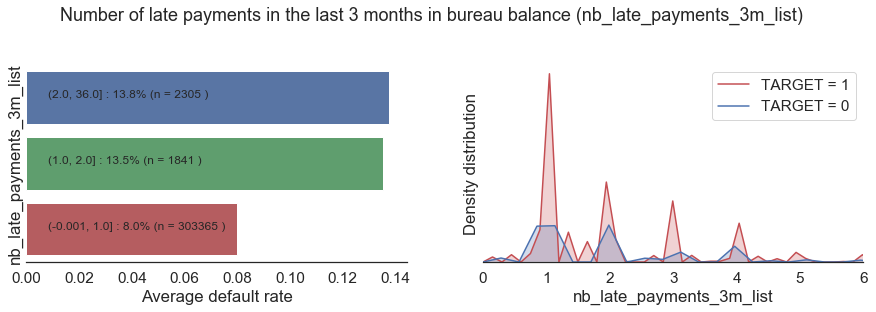

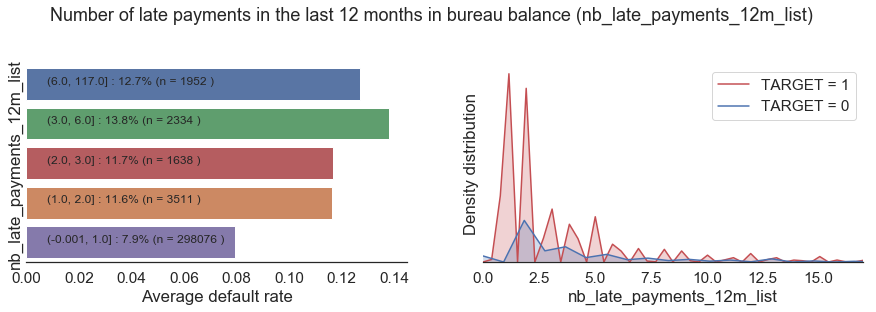

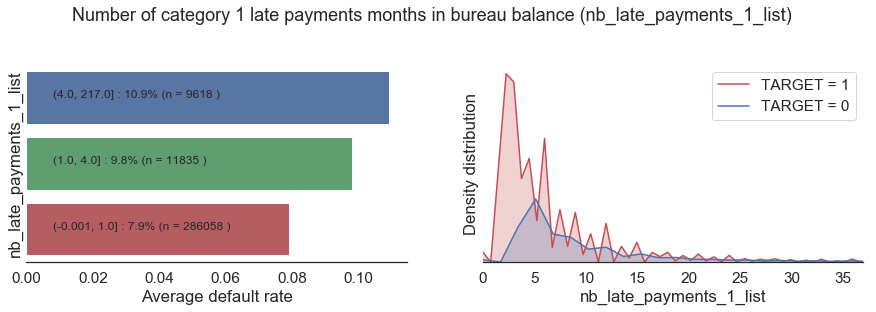

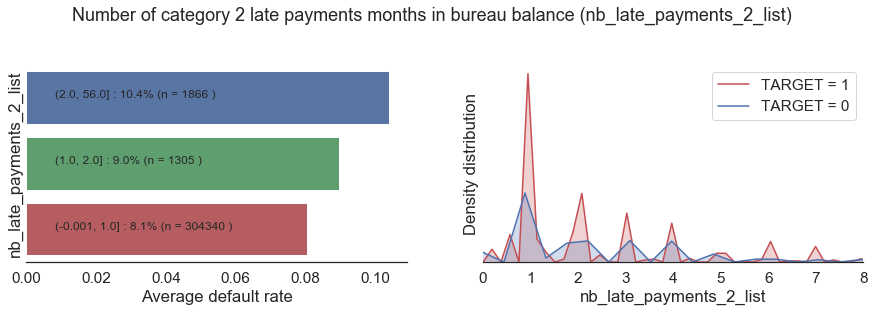

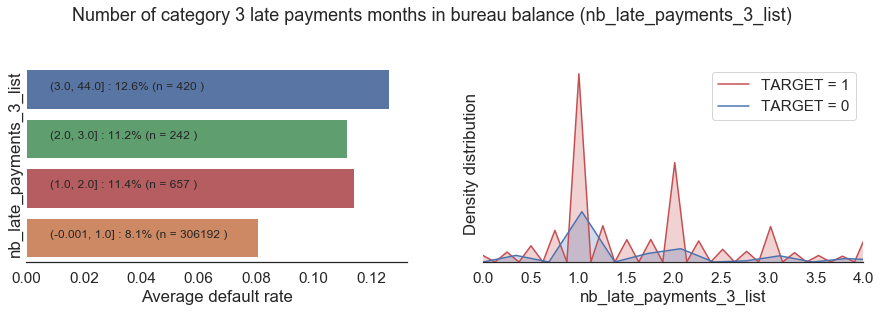

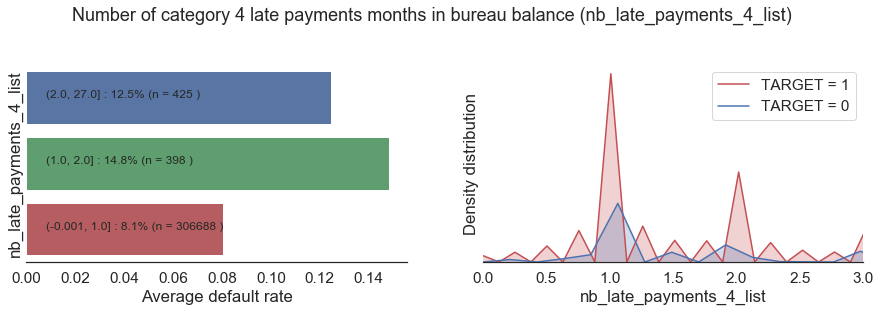

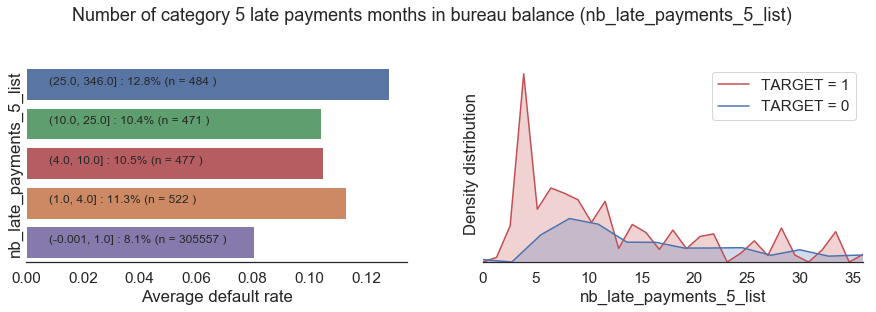

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


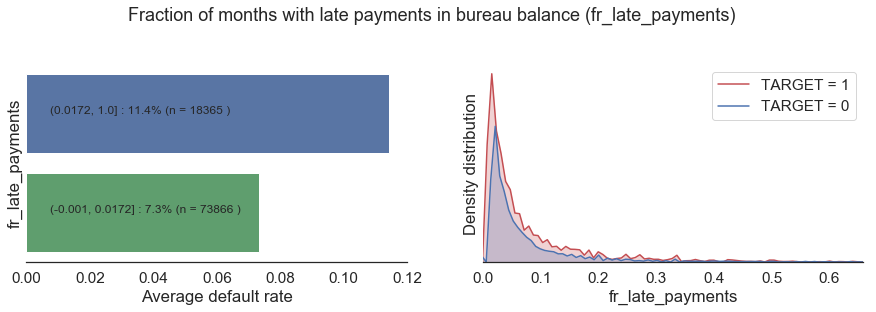

In [12]:
def display_discrete_feature(df, feature, target):
    # Creating figure and axes
    fig = plt.figure(figsize=(15,8))
    ax1 = fig.add_subplot(2, 2, 1)
    ax2 = fig.add_subplot(2, 2, 2)
    
    # Print title
    title = homecredit_columns_description[homecredit_columns_description["Row"] == feature]["Description"].tolist()[0] + " (" + feature + ")"
    # If title is too long, reduce font size
    if len(title) <= 100:
        plt.suptitle(title, size = 18)
    else:
        plt.suptitle(title, size = 18*100/len(title))
    
    # Bar plot of mean target as a function of feature value
    df_grouped = df[[feature, target]].groupby([feature]).agg(["mean", "count"])
    # In case of non numerical categorial data, sort by value count
    if type(df_grouped.index[0]) == str:
        df_grouped = df_grouped.sort_values(by = [("TARGET", "count")], ascending = False)
    index = df_grouped.index
    height = df_grouped[("TARGET", "mean")].tolist()
    count = df_grouped[("TARGET", "count")].tolist()
    sns.barplot(index, height, ax = ax1)
    if len(count) >= 5:
        ax1.tick_params(axis='x', rotation=90, labelleft = True)
    ax1.set_xlabel("")
    ax1.set_ylabel('Average default rate')

    sns.despine(bottom=True, ax = ax1)
    # Writing target average and count for each bar plot
    for i, item in enumerate(count):
        ax1.text(x = i , y = height[i]/2, s = str(round(height[i]*100,1))+"%", size = 12, horizontalalignment='center')
        ax1.text(x = i , y = height[i]/2-np.max(height)/20, s = "n = "+str(item)+" ("+str(round(item/len(df)*100, 1))+"%)", size = 10, horizontalalignment='center')

    # Pie chart for the selected feature
    df_value_count = df[feature].value_counts()/len(df[feature].dropna())
    # In case of numerical categorial data, sort by index
    if type(df_value_count.index[0]) != str:
        df_value_count = df_value_count.sort_index()
    # If there are more than 2 categories with low count, then group in Others category
    if len(df_value_count[df_value_count < 2/100]) >= 2:
        df_value_count = df_value_count[df_value_count > 2/100]
        df_value_count["Others"] = 1 - df_value_count.sum()
    df_value_count.plot(kind="pie", autopct="%1.1f%%", ax = ax2, startangle = 0
                        , counterclock = False, textprops=dict(fontsize=12), 
                       wedgeprops = {'linewidth': 0} )
    ax2.set_ylabel("")
    ax2.axis('equal')

    plt.show()
    
    
def display_continuous_feature(df, feature, target, bins):
    # Creating figure and axes
    fig = plt.figure(figsize=(15,8))
    ax1 = fig.add_subplot(2, 2, 1)
    ax2 = fig.add_subplot(2, 2, 2)
   
    # Print title
    title = homecredit_columns_description[homecredit_columns_description["Row"] == feature]["Description"].tolist()[0]
    # If title is too long, reduce font size
    if len(title) <= 100:
        plt.suptitle(title+ " (" + feature + ")", size = 18)
    else:
        plt.suptitle(title+ " (" + feature + ")", size = 18*100/len(title))

    # Barplot of mean target as a function of feature value
    feature_bins = pd.qcut(df[feature], bins, duplicates = "drop")
    while len(feature_bins.unique()) <= 2:
        bins = bins * 5
        feature_bins = pd.qcut(df[feature], bins, duplicates = "drop")
    df2 = df.pivot_table(target, feature_bins).reset_index().sort_values(by = [feature], ascending = False).reset_index(drop = True)
    df3 = df.pivot_table(target, feature_bins, aggfunc='count').reset_index().sort_values(by = [feature], ascending = False).reset_index(drop = True)
    sns.barplot(y=feature, x=target, orient = "h", data = df2, ax = ax1, order = df2[feature])
    height = df2[target]
    count =  df3[target]
    ax1.set_ylabel(feature)
    ax1.set_xlabel('Average default rate')
    ax1.set_yticks([])
    for i, item in enumerate(count):
        ax1.text(y = i , x = min(height)/10, s = str(df2[feature][i]) + " : "+ str(round(height[i]*100,1))+"%" +" (n = "+str(item)+" )", size = 12, horizontalalignment='left')
    sns.despine(left=True, ax = ax1)

    # Kernel Density Estimate of the feature for both target values
    sns.kdeplot(df[df["TARGET"] == 1][feature], shade=True, color = pal.as_hex()[2], ax = ax2, label="TARGET = 1")
    sns.kdeplot(df[df["TARGET"] == 0][feature], shade=True, color = pal.as_hex()[0], ax = ax2, label="TARGET = 0")
    ax2.set_xlabel(feature)
    ax2.set_ylabel('Density distribution')
    ax2.set_yticks([])
    min_x = min(df[df["TARGET"] == 1][feature].quantile(.001), df[df["TARGET"] == 0][feature].quantile(.001))
    max_x = min(df[df["TARGET"] == 1][feature].quantile(.999), df[df["TARGET"] == 0][feature].quantile(.999))
    ax2.set_xlim([min_x, max_x])
    sns.despine(left=True, ax = ax2)
    plt.show()

for feature in discrete_features:
    display_discrete_feature(application[application["train"] == 1], feature, "TARGET")

for index, feature in enumerate(continuous_features):
    display_continuous_feature(application[application["train"] == 1], feature, "TARGET", 5)